In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [21]:
#cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
 #       ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
income_training = pd.read_csv('train.csv')
income_training.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
income_training.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [7]:
# adult_data = pd.read_csv('test.csv', names=cols)
# adult_data.head()

In [22]:
print(income_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43957 non-null  int64 
 1   workclass       41459 non-null  object
 2   fnlwgt          43957 non-null  int64 
 3   education       43957 non-null  object
 4   education-num   43957 non-null  int64 
 5   marital-status  43957 non-null  object
 6   occupation      41451 non-null  object
 7   relationship    43957 non-null  object
 8   race            43957 non-null  object
 9   sex             43957 non-null  object
 10  capital-gain    43957 non-null  int64 
 11  capital-loss    43957 non-null  int64 
 12  hours-per-week  43957 non-null  int64 
 13  native-country  43194 non-null  object
 14  income          43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB
None


### Checking that your target variable is binary

<AxesSubplot:xlabel='income', ylabel='count'>

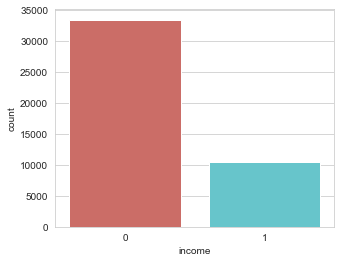

In [23]:
sb.countplot(x='income', data=income_training, palette='hls')

### Checking for missing values

In [24]:
income_training.isnull().sum()

age                  0
workclass         2498
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2506
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     763
income               0
dtype: int64

In [25]:
income_training.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### Taking care of missing values
##### Dropping missing values

In [26]:
income_training = income_training.drop(['workclass','education','marital-status','occupation','relationship','race','native-country'], axis=1)
income_training.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income
0,67,366425,16,Male,99999,0,60,1
1,17,244602,8,Male,0,0,15,0
2,31,174201,13,Male,0,0,40,1
3,58,110199,4,Male,0,0,40,0
4,25,149248,10,Male,0,0,40,0


In [27]:
income_training.isnull().sum()

age               0
fnlwgt            0
education-num     0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64

### Converting categorical variables to a dummy indicators

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = income_training['sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [30]:
income_training[0:10]

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income
0,67,366425,16,Male,99999,0,60,1
1,17,244602,8,Male,0,0,15,0
2,31,174201,13,Male,0,0,40,1
3,58,110199,4,Male,0,0,40,0
4,25,149248,10,Male,0,0,40,0
5,59,105363,9,Male,0,0,40,0
6,70,216390,5,Female,2653,0,40,0
7,35,361888,13,Male,0,0,60,0
8,28,74784,9,Male,0,0,50,0
9,28,118089,9,Male,4386,0,45,1


In [32]:
gender_DF = pd.DataFrame(gender_encoded, columns=['male'])
gender_DF[0:10]

,male
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,1


### if any other variables are needed to be encoded to binary, do that here

In [34]:
income_training.drop(['sex'], axis=1, inplace=True)
income_training.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,67,366425,16,99999,0,60,1
1,17,244602,8,0,0,15,0
2,31,174201,13,0,0,40,1
3,58,110199,4,0,0,40,0
4,25,149248,10,0,0,40,0


In [35]:
income_dmy = pd.concat([income_training, gender_DF], axis=1, verify_integrity=True).astype(float)
income_dmy.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,male
0,67.0,366425.0,16.0,99999.0,0.0,60.0,1.0,1.0
1,17.0,244602.0,8.0,0.0,0.0,15.0,0.0,1.0
2,31.0,174201.0,13.0,0.0,0.0,40.0,1.0,1.0
3,58.0,110199.0,4.0,0.0,0.0,40.0,0.0,1.0
4,25.0,149248.0,10.0,0.0,0.0,40.0,0.0,1.0


### Checking for independence between features

<AxesSubplot:>

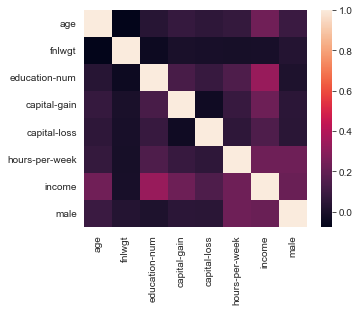

In [36]:
sb.heatmap(income_dmy.corr())

### Checking that your dataset size is sufficient

In [37]:
income_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43957 non-null  float64
 1   fnlwgt          43957 non-null  float64
 2   education-num   43957 non-null  float64
 3   capital-gain    43957 non-null  float64
 4   capital-loss    43957 non-null  float64
 5   hours-per-week  43957 non-null  float64
 6   income          43957 non-null  float64
 7   male            43957 non-null  float64
dtypes: float64(8)
memory usage: 2.7 MB


### Deploying and evaluating the model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(income_dmy.drop('income', axis=1),
                                                   income_dmy['income'], test_size=0.2,
                                                   random_state=200)

In [39]:
print(X_train.shape)
print(y_train.shape)

(35165, 7)
(35165,)


In [40]:
X_train[0:5]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,male
18301,27.0,151382.0,9.0,0.0,0.0,40.0,1.0
11454,35.0,200445.0,9.0,0.0,1974.0,40.0,1.0
25178,23.0,45713.0,10.0,0.0,0.0,40.0,1.0
11562,39.0,318918.0,13.0,0.0,0.0,40.0,1.0
5272,58.0,111385.0,9.0,0.0,0.0,40.0,1.0


### Deploying and evaluating the model

In [42]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')


In [43]:
y_pred = LogReg.predict(X_test)

## Model Evaluation
### Classification report without cross-validation

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      6706
         1.0       0.74      0.27      0.39      2086

    accuracy                           0.80      8792
   macro avg       0.77      0.62      0.64      8792
weighted avg       0.79      0.80      0.77      8792



### K-fold cross-validation & confusion matrices

In [45]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[25859,   874],
       [ 6309,  2123]], dtype=int64)

In [46]:
precision_score(y_train, y_train_pred)

0.7083750417083751

### Make a test prediction

In [47]:
income_dmy[863:864]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,male
863,42.0,152676.0,9.0,0.0,0.0,40.0,0.0,1.0


In [48]:
test_can1 = np.array([44, 152676, 9, 0, 0, 40, 1]).reshape(1,-1)

print(LogReg.predict(test_can1))
print(LogReg.predict_proba(test_can1))

[0.]
[[0.74782971 0.25217029]]


C:\Users\abdur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\abdur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
income_dmy[1861:1862]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,male
1861,33.0,164190.0,11.0,7298.0,0.0,40.0,1.0,1.0


In [50]:
test_can1 = np.array([35, 164190, 11, 7298, 0, 40, 1]).reshape(1,-1)

print(LogReg.predict(test_can1))
print(LogReg.predict_proba(test_can1))

[1.]
[[0.22716317 0.77283683]]


C:\Users\abdur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\abdur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Test Case

In [54]:
income_test = pd.read_csv('test.csv')
income_test.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
income_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [55]:
print(income_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             899 non-null    int64 
 1   workclass       899 non-null    object
 2   fnlwgt          899 non-null    int64 
 3   education       899 non-null    object
 4   education-num   899 non-null    int64 
 5   marital-status  899 non-null    object
 6   occupation      899 non-null    object
 7   relationship    899 non-null    object
 8   race            899 non-null    object
 9   sex             899 non-null    object
 10  capital-gain    899 non-null    int64 
 11  capital-loss    899 non-null    int64 
 12  hours-per-week  899 non-null    int64 
 13  native-country  899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB
None


In [56]:
income_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [57]:
income_test = income_test.drop(['workclass','education','marital-status','occupation','relationship','race','native-country'], axis=1)
income_test.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week
0,39,327120,9,Male,0,0,40
1,32,123253,12,Male,0,0,42
2,47,232628,9,Male,0,0,40
3,19,374262,8,Male,0,0,20
4,46,311231,9,Male,0,0,40


In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = income_test['sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [59]:
income_test[0:10]

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week
0,39,327120,9,Male,0,0,40
1,32,123253,12,Male,0,0,42
2,47,232628,9,Male,0,0,40
3,19,374262,8,Male,0,0,20
4,46,311231,9,Male,0,0,40
5,45,148900,13,Male,0,0,50
6,34,118786,13,Male,0,0,20
7,38,222532,15,Female,0,0,45
8,40,270147,14,Female,0,0,40
9,47,184005,9,Female,3325,0,45


In [60]:
gender_DF = pd.DataFrame(gender_encoded, columns=['male'])
gender_DF[0:10]

,male
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,0
9,0


In [61]:
income_test.drop(['sex'], axis=1, inplace=True)
income_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,327120,9,0,0,40
1,32,123253,12,0,0,42
2,47,232628,9,0,0,40
3,19,374262,8,0,0,20
4,46,311231,9,0,0,40


In [62]:
income_test_dmy = pd.concat([income_test, gender_DF], axis=1, verify_integrity=True).astype(float)
income_test_dmy.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,male
0,39.0,327120.0,9.0,0.0,0.0,40.0,1.0
1,32.0,123253.0,12.0,0.0,0.0,42.0,1.0
2,47.0,232628.0,9.0,0.0,0.0,40.0,1.0
3,19.0,374262.0,8.0,0.0,0.0,20.0,1.0
4,46.0,311231.0,9.0,0.0,0.0,40.0,1.0


In [73]:
# print(LogReg.predict(income_test_dmy))

In [87]:
income = pd.DataFrame(LogReg.predict(income_test_dmy))
income.columns = ['income']
income

,income
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
894,0.0
895,0.0
896,0.0
897,0.0


In [81]:
income.sum()

79

In [94]:
income = income['income'].apply(int)
income[0:20]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: income, dtype: int64

In [98]:
for i in range(899):
    print(i, income.loc[i], sep=',')

0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0
12,0
13,0
14,0
15,0
16,0
17,0
18,0
19,1
20,0
21,0
22,0
23,0
24,0
25,0
26,0
27,0
28,0
29,1
30,0
31,0
32,0
33,0
34,0
35,0
36,1
37,0
38,1
39,0
40,0
41,0
42,1
43,0
44,0
45,0
46,0
47,0
48,0
49,0
50,0
51,0
52,1
53,0
54,0
55,0
56,0
57,0
58,0
59,0
60,1
61,0
62,0
63,0
64,0
65,0
66,0
67,0
68,0
69,0
70,0
71,0
72,0
73,0
74,0
75,0
76,0
77,0
78,0
79,0
80,0
81,0
82,0
83,1
84,0
85,0
86,0
87,1
88,0
89,0
90,0
91,0
92,0
93,0
94,0
95,0
96,0
97,0
98,0
99,1
100,1
101,0
102,0
103,0
104,0
105,0
106,0
107,0
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,0
117,0
118,0
119,0
120,0
121,0
122,0
123,0
124,0
125,0
126,0
127,0
128,0
129,0
130,0
131,0
132,0
133,0
134,0
135,0
136,0
137,0
138,0
139,1
140,0
141,0
142,0
143,0
144,0
145,0
146,0
147,0
148,0
149,0
150,0
151,1
152,1
153,0
154,0
155,0
156,1
157,1
158,1
159,0
160,0
161,0
162,0
163,0
164,0
165,1
166,1
167,0
168,0
169,0
170,0
171,1
172,0
173,0
174,1
175,0
176,0
177,0
178,0
179,0
180,0
181,0
182,0
183,0
184,0
